# Simulating From the Null Hypothesis

In the previous lesson on confidence intervals, we saw how we could simulate a sampling distribution for a statistic by bootstrapping our sample data. Alternatively, in hypothesis testing, we could simulate a sampling distribution from the null hypothesis using characteristics that would be true if our data were to have come from the null.

In this notebook, you will walk through this process, and answer some quiz questions to solidify your understanding.



__If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?__

The average height for all coffee drinkers is the same as the average height for all non-coffee drinkers.
$$H_0:\mu_{height\,of\,coffee} = \mu_{height\,of\,nocoffee} $$

The average height for all coffee drinkers is not the same as the average height for all non-coffee drinkers.
$$H_1:\mu_{height\,of\,coffee} \,\,!= \mu_{height\,of\,nocoffee} $$

_<b>Since there is no directional component associated with this statement, we can re consider the null and alternative hypotheis as below.<b>_

$$H_0:\mu_{height\,of\,coffee} - \mu_{height\,of\,nocoffee} = 0$$

$$H_1:\mu_{height\,of\,coffee} \,\,- \mu_{height\,of\,nocoffee} ≠ 0$$


__Similarly If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?__

In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers. Below is one of the ways you could write the null and alternative. Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative

$$H_0:\mu_{height\,of\,coffee} - \mu_{height\,of\,nocoffee}≥0$$
 
$$H_0:\mu_{height\,of\,coffee} - \mu_{height\,of\,nocoffee}<0$$

$\mu_{height\,of\,coffee}$ and $\mu_{height\,of\,nocoffee}$ are the population mean height values for coffee drinkers and non-coffee drinkers, respectivley.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

#pull the coffee dataset and store it in a dataframe
df = pd.read_csv('coffee_dataset.csv')

#take a sample of 200 and give a new name 
sample_df = df.sample(200)

#### The standard deviation of the sampling distribution for the mean of those that drink coffee

In [69]:
#bootstrap the sample and find the mean height of those who drink cofee
#and store it in a vector called coffee_means and repeat this for 10000 times
coffee_means = []
for _ in range(10000):
    bootsample = sample_df.sample(200, replace = True)
    coffee_means.append(bootsample[bootsample['drinks_coffee'] == True]['height'].mean())

In [70]:
#find the standard deviation of the sampling distribution for the mean of those who drink coffee
np.std(coffee_means)

0.24073763373473

#### The standard deviation of the sampling distribution for the mean of those that do not drink coffee

In [71]:
#repeat the above process same process for those who do not drink cofee
nocoffee_means = []
for _ in range(10000):
    bootsample = sample_df.sample(200, replace = True)
    nocoffee_means.append(bootsample[bootsample['drinks_coffee'] == False]['height'].mean())

In [72]:
#find the out The standard deviation of the sampling distribution for the mean of those that do not drink coffee
np.std(nocoffee_means)

0.4042483814775941

#### Shape of sampling distribution:- Looks like a normal distribution as per the central limiy theorem

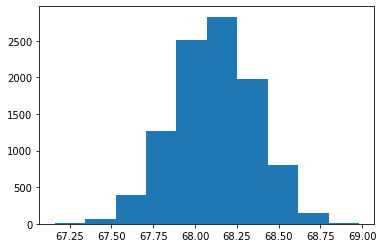

In [73]:
plt.hist(coffee_means);

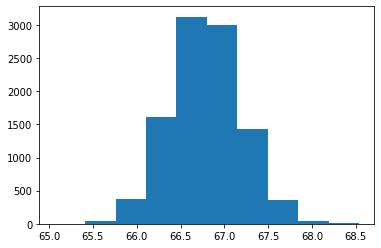

In [74]:
plt.hist(nocoffee_means);

#### The standard deviation of the sampling distribution for the difference in means of those that drink coffee and those do not.

In [80]:
#repeat the bootstrapping process that we did earlier,but this time to find the difference in mean height and store it in a vecto called diff
diff = []
for _ in range(10000):
    bootsample = sample_df.sample(200, replace = True)
    coffee_mean = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    nocoffee_mean = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff.append(coffee_mean - nocoffee_mean)

In [81]:
#find the The standard deviation of the sampling distribution for the difference in means of those that drink coffee and those do not.
np.std(diff)

0.469475402733036

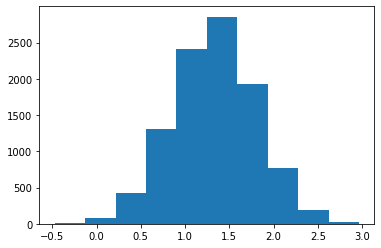

In [82]:
plt.hist(diff);

#### Use your solutions about the sampling distribution, and what difference in means would be likely from the null hypothesis 

Now, use your sampling distribution for the difference in means and the docs to simulate what you would expect if your sampling distribution were centered on zero. Also, calculate the observed sample mean difference in sample_df. Use your solutions to answer the last questions in the quiz below.

By central limit theorem it would follow normal distribution (_With a sample size of 150, the mean should follow a normal distribution by the central limit theorem_). Now from the [numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) on normal distribution , we see we can simulate draws from the normal distribution using the hypothesis mean at zero in the standard deviation of our sampling distribution following way.

In [83]:
#in this equation, the parameter loc which is the difference in mean of the distribution which is 0, 
#and parameter scale is the standard deviation of the sampling distribution of difference in mean and we can simulate for a 10000 values now

null_values = np.random.normal(0, np.std(diff), 10000)

Each of the simulated null values or each of the simulated draws here represents the possible mean values from null hpothesis

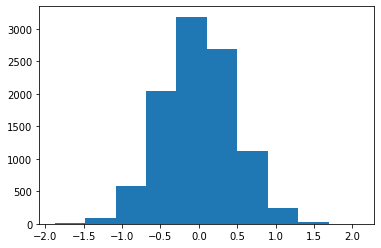

In [84]:
#lets plot the possible mean values from the null hypothesis
plt.hist(null_values);

we can now ask the question whre the sample mean falls in this above distribution

We can expect the standard deviation of the sampling distribution for differences from the null to be essentially the same as what we observed from the data.
If the null hypothesis is true, we would expect the difference in means of coffee drinkers and non-drinkers to be zero.

_<b>Comparing the actual difference in sample mean to this null hypothesis distribution tells us the likelihood of our statistics coming from the Null<b>_
  
If we go back and have a look at where our sample mean was, which is the value 0.47. It falls inside above plotted histogram of null hypothesis distribution. Which indicated that the sample mean 0.47 is came from the null hypothesis values. And ther for the null is more likely to be true.

### Some Clarity On The Ending
In the end, it is suggested that we do not believe that our null hypothesis value of diffenrece in mean 0 would be supported, which is true. However, since our null is that the population mean is greater than or equal to 0, we do have evidence to support this claim with our sample mean of approximately 0.47. This would suggest not rejecting our one-sided null alternative.
